/tmp/ipykernel_88836/3812432034.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


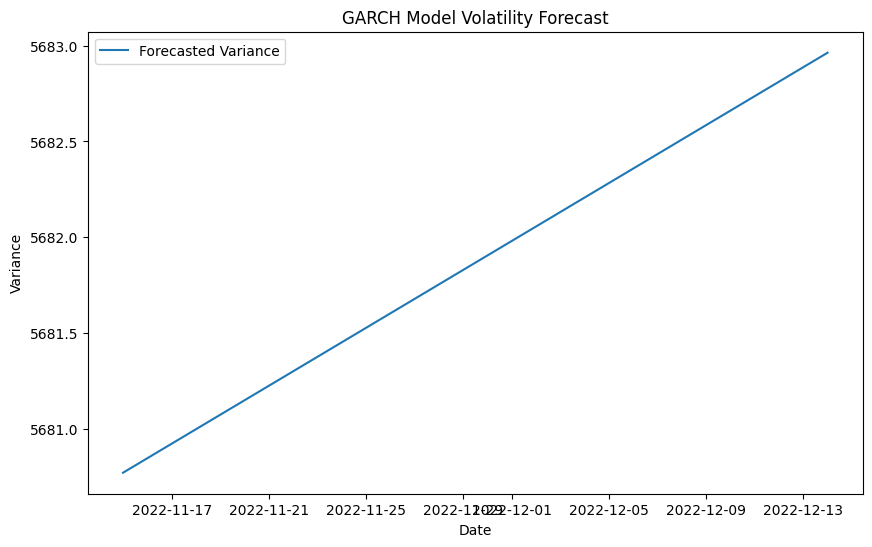

In [11]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Load processed data
data = pd.read_csv('../Inputs/data/processed_data/brent_oil_prices.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Fit GARCH model
model = arch_model(data['Price'], vol='Garch', p=1, q=1)
garch_result = model.fit(disp='off')

# Forecast volatility
forecast_horizon = 30
volatility_forecast = garch_result.forecast(horizon=forecast_horizon)

# Extract forecasted variance and dates
forecasted_variance = volatility_forecast.variance.values[-1]  # Last forecasted variance
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=forecast_horizon + 1, freq=data['Date'].iloc[1] - data['Date'].iloc[0])

# Plot volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates[1:], forecasted_variance, label='Forecasted Variance')
plt.title('GARCH Model Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Save results to CSV
forecast_df = pd.DataFrame({'Date': forecast_dates[1:], 'Forecasted_Variance': forecasted_variance})
forecast_df.to_csv('../Results/garch/forecast.csv', index=False)
